In [1]:
%matplotlib inline
import sys 
sys.path.append('../../../')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gpflow, gpitch

In [2]:
gpitch.amtgp.init_settings()
plt.rcParams['figure.figsize'] = (18, 5)  # set plot size

In [3]:
Nc = 5
var = 10*np.random.rand(Nc)
leng = np.random.rand(Nc)
freq = 20*np.random.rand(Nc)

kc1 = gpitch.kernels.MaternSpecMix(input_dim=1, lengthscales=leng, variances=var, frequencies=freq)
kc2 = gpitch.kernels.MaternSpecMix(input_dim=1, lengthscales=leng, variances=var, frequencies=freq)
ka1 = gpflow.kernels.Matern32(input_dim=1, lengthscales=0.25, variance=1.)
ka2 = gpflow.kernels.Matern32(input_dim=1, lengthscales=0.25, variance=1.)
kc = [kc1, kc2]
ka = [ka1, ka2]

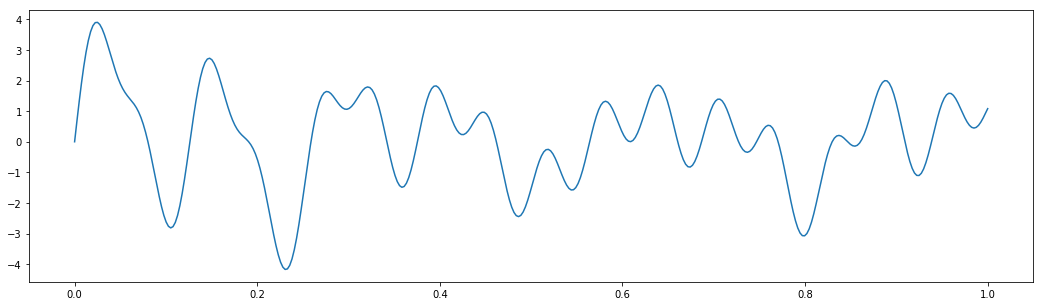

In [4]:
N = 400
x = np.linspace(0., 1., N).reshape(-1, 1)
y = np.zeros((N,1))
for i in range(freq.size):
    y += np.sin(2*np.pi*freq[i]*x)

plt.plot(x, y)

In [5]:
ws = N//2
dec = 10
m = gpitch.loopdet.LooPDet(x=x, y=y, kern_comps=kc, kern_acts=ka, ws=ws, dec=dec)
m.m.kern_f1.fixed = True
m.m.kern_f2.fixed = True
m.m.kern_g1.fixed = True
m.m.kern_g2.fixed = True

In [6]:
print m.m.kern_f1.variance_1

variance_1 transform:+ve prior:None [FIXED]
[ 6.03083543]


In [7]:
def update_params_com(obj, new_params):
    for i in range(Nc):
        setattr(obj, 'variance_' + str(i+1), new_params)
        setattr(obj, 'lengthscale_' + str(i+1), new_params)
        setattr(obj, 'frequency_' + str(i+1), new_params)
        
def update_params_act(obj, new_params):
    setattr(obj, 'variance', new_params)
    setattr(obj, 'lengthscales', new_params)
        
def update_params(objs, new_params):
    update_params_com(objs[0], new_params[0])
    update_params_com(objs[1], new_params[1])
    update_params_act(objs[2], new_params[2])
    update_params_act(objs[3], new_params[3])    

In [8]:
m.m.kern_f1

Name,values,prior,constraint
kern_f1.frequency_1,[ 7.1326041],None,[FIXED]
kern_f1.frequency_2,[ 15.9885914],None,[FIXED]
kern_f1.frequency_3,[ 7.63724917],None,[FIXED]
kern_f1.frequency_4,[ 8.30322554],None,[FIXED]
kern_f1.frequency_5,[ 3.46330945],None,[FIXED]
kern_f1.lengthscale_1,[ 0.44207422],None,[FIXED]
kern_f1.lengthscale_2,[ 0.45762711],None,[FIXED]
kern_f1.lengthscale_3,[ 0.9158935],None,[FIXED]
kern_f1.lengthscale_4,[ 0.09732513],None,[FIXED]
kern_f1.lengthscale_5,[ 0.92750079],None,[FIXED]


In [9]:
m.m.kern_f2

Name,values,prior,constraint
kern_f2.frequency_1,[ 7.1326041],None,[FIXED]
kern_f2.frequency_2,[ 15.9885914],None,[FIXED]
kern_f2.frequency_3,[ 7.63724917],None,[FIXED]
kern_f2.frequency_4,[ 8.30322554],None,[FIXED]
kern_f2.frequency_5,[ 3.46330945],None,[FIXED]
kern_f2.lengthscale_1,[ 0.44207422],None,[FIXED]
kern_f2.lengthscale_2,[ 0.45762711],None,[FIXED]
kern_f2.lengthscale_3,[ 0.9158935],None,[FIXED]
kern_f2.lengthscale_4,[ 0.09732513],None,[FIXED]
kern_f2.lengthscale_5,[ 0.92750079],None,[FIXED]


In [10]:
m.m.kern_g1

Name,values,prior,constraint
kern_g1.lengthscales,[ 0.25],None,[FIXED]
kern_g1.variance,[ 1.],None,[FIXED]


In [11]:
m.m.kern_g2

Name,values,prior,constraint
kern_g2.lengthscales,[ 0.25],None,[FIXED]
kern_g2.variance,[ 1.],None,[FIXED]


In [12]:
objs = [m.m.kern_f1, m.m.kern_f2, m.m.kern_g1, m.m.kern_g2]
new_params = [10., 34., 0.1, 0.3]
update_params(objs, new_params) 

In [13]:
m.m.kern_f1

Name,values,prior,constraint
kern_f1.frequency_1,[ 10.],None,[FIXED]
kern_f1.frequency_2,[ 10.],None,[FIXED]
kern_f1.frequency_3,[ 10.],None,[FIXED]
kern_f1.frequency_4,[ 10.],None,[FIXED]
kern_f1.frequency_5,[ 10.],None,[FIXED]
kern_f1.lengthscale_1,[ 10.],None,[FIXED]
kern_f1.lengthscale_2,[ 10.],None,[FIXED]
kern_f1.lengthscale_3,[ 10.],None,[FIXED]
kern_f1.lengthscale_4,[ 10.],None,[FIXED]
kern_f1.lengthscale_5,[ 10.],None,[FIXED]


In [14]:
m.m.kern_f2

Name,values,prior,constraint
kern_f2.frequency_1,[ 34.],None,[FIXED]
kern_f2.frequency_2,[ 34.],None,[FIXED]
kern_f2.frequency_3,[ 34.],None,[FIXED]
kern_f2.frequency_4,[ 34.],None,[FIXED]
kern_f2.frequency_5,[ 34.],None,[FIXED]
kern_f2.lengthscale_1,[ 34.],None,[FIXED]
kern_f2.lengthscale_2,[ 34.],None,[FIXED]
kern_f2.lengthscale_3,[ 34.],None,[FIXED]
kern_f2.lengthscale_4,[ 34.],None,[FIXED]
kern_f2.lengthscale_5,[ 34.],None,[FIXED]


In [15]:
m.m.kern_g1

Name,values,prior,constraint
kern_g1.lengthscales,[ 0.1],None,[FIXED]
kern_g1.variance,[ 0.1],None,[FIXED]


In [16]:
m.m.kern_g2

Name,values,prior,constraint
kern_g2.lengthscales,[ 0.3],None,[FIXED]
kern_g2.variance,[ 0.3],None,[FIXED]
